# Thera Bank Personal Loan Campaign

## Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs


Import Dataset

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
# Check data type 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


It is observed that some of the columns as baiscally categorical data type however they are defined as 'int64' in original dataset. Let's convert them into categorical dataype 

In [51]:
df[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']] = df[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.5 KB
None


In [52]:
# Review statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


<b> Observations: </b> <br>
1) ID column doesn't provide any information for analysis hence it can be dropped form the dataset <br>
2) Experience shows minimum experience as -3, which is incorrect and needs further investigation and correction. Further investigation shows that there are 52 observations where experience is less then 0. This issue exists for set of population which has median age 24. Therefore it will be appropriate to assign experience as 0 for this population.

In [53]:
df.drop('ID', axis=1, inplace=True)

In [54]:
print('Number of folks with negative experience: ', len(df[df['Experience'] <0]))
print()
print('Median age of this population: ',df[df['Experience'] <0]['Age'].median())
# Assign experience as 0 for this set of population. Since median is 24 hence we can assign experience as 0 for these folks
# know which values need to be replaced: -1, -2, -3
df['Experience'] = df['Experience'].replace(-1,0)
df['Experience'] = df['Experience'].replace(-2,0)
df['Experience'] = df['Experience'].replace(-3,0)

print('Number of folks with negative experience: ', len(df[df['Experience'] <0]))

# exp_under_0 = df[df['Experience'] <0]['Experience']
# for i in range(exp_under_0.min(), 0): exp_under_0 = exp_under_0.replace(i,0)
# exp_under_0

#df['Experience'] = exp_under_0

Number of folks with negative experience:  52

Median age of this population:  24.0
Number of folks with negative experience:  0


In [55]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [56]:
# Let us look at the target column which is 'Personal loans' to understand how the data is distributed amongst the various values
df.groupby(['Personal Loan']).mean()
df.groupby(['Personal Loan']).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


(5000, 13)


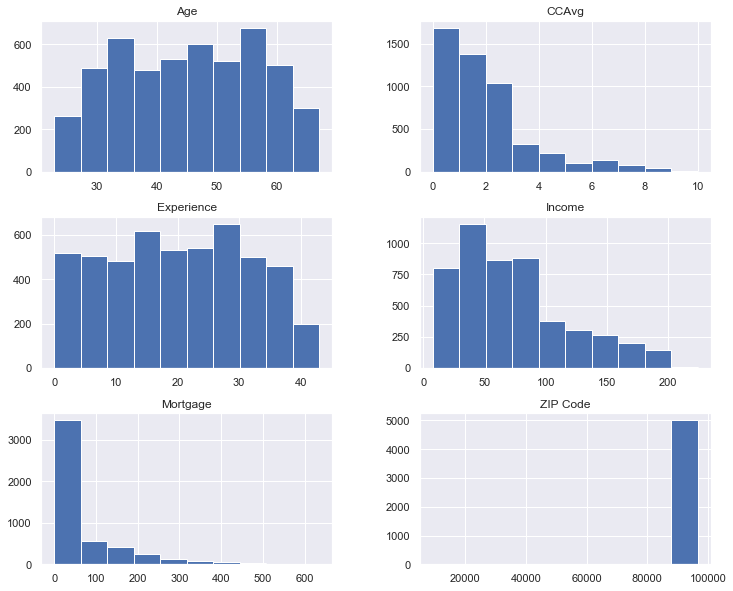

In [57]:
# Check shape of the data
print(df.shape)
df.hist(figsize=(12,10));

We can observe from above histogram that CCAvg, Income and Mortgage is right skewed. 

In [58]:
# Null values or incorrect imputation
df.isnull().values.any()

False

### 2. EDA: Study the data distribution in each attribute and target variable,

In [59]:
# Number of unique in each column
print('Number of unique in each column:')
print(df.nunique())
print()


Number of unique in each column:
Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64



In [60]:
print('Number of people with zero mortgage: ')
print(len(df[df['Mortgage'] == 0]))
print()


Number of people with zero mortgage: 
3462



In [61]:
print('Number of people with zero credit card spending per month: ')
print(len(df[df['CCAvg'] == 0]))
print()



Number of people with zero credit card spending per month: 
106



In [62]:
#num_df = df._get_numeric_data()

#Lets get the valus counts for categorical data

for i in range(0, len(df.columns)):
    if(df[df.columns[i]].dtype.name == "category"):
        print('Value count in: ',df.columns[i])
        print(df[df.columns[i]].value_counts())
        print()
#df.column
#df.select_dtypes(include=['category'])

Value count in:  Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value count in:  Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value count in:  Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Value count in:  Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

Value count in:  CD Account
0    4698
1     302
Name: CD Account, dtype: int64

Value count in:  Online
1    2984
0    2016
Name: Online, dtype: int64

Value count in:  CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64



<b>Univariate Analysis </b>

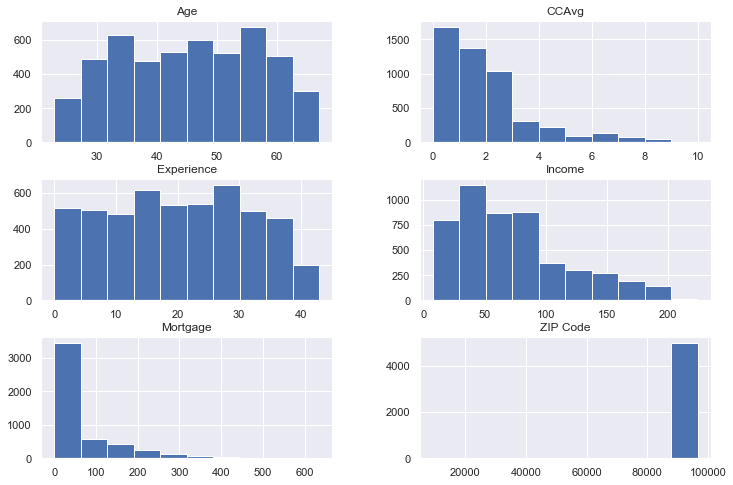

In [63]:
df.hist(stacked=False, figsize=(12,40), layout=(14,2)); #see distribution of data

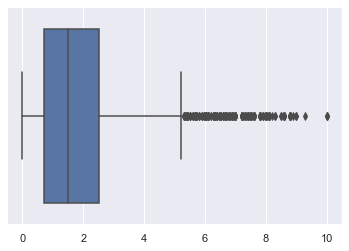

In [64]:
sns.boxplot([df['CCAvg']]);

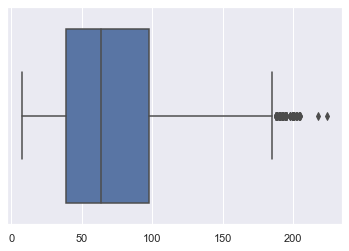

In [65]:
sns.boxplot([df['Income']]);

It is observed from box plot as well that CCAvg, Mortgage and income is right screwed <br>



Bivariate analysis

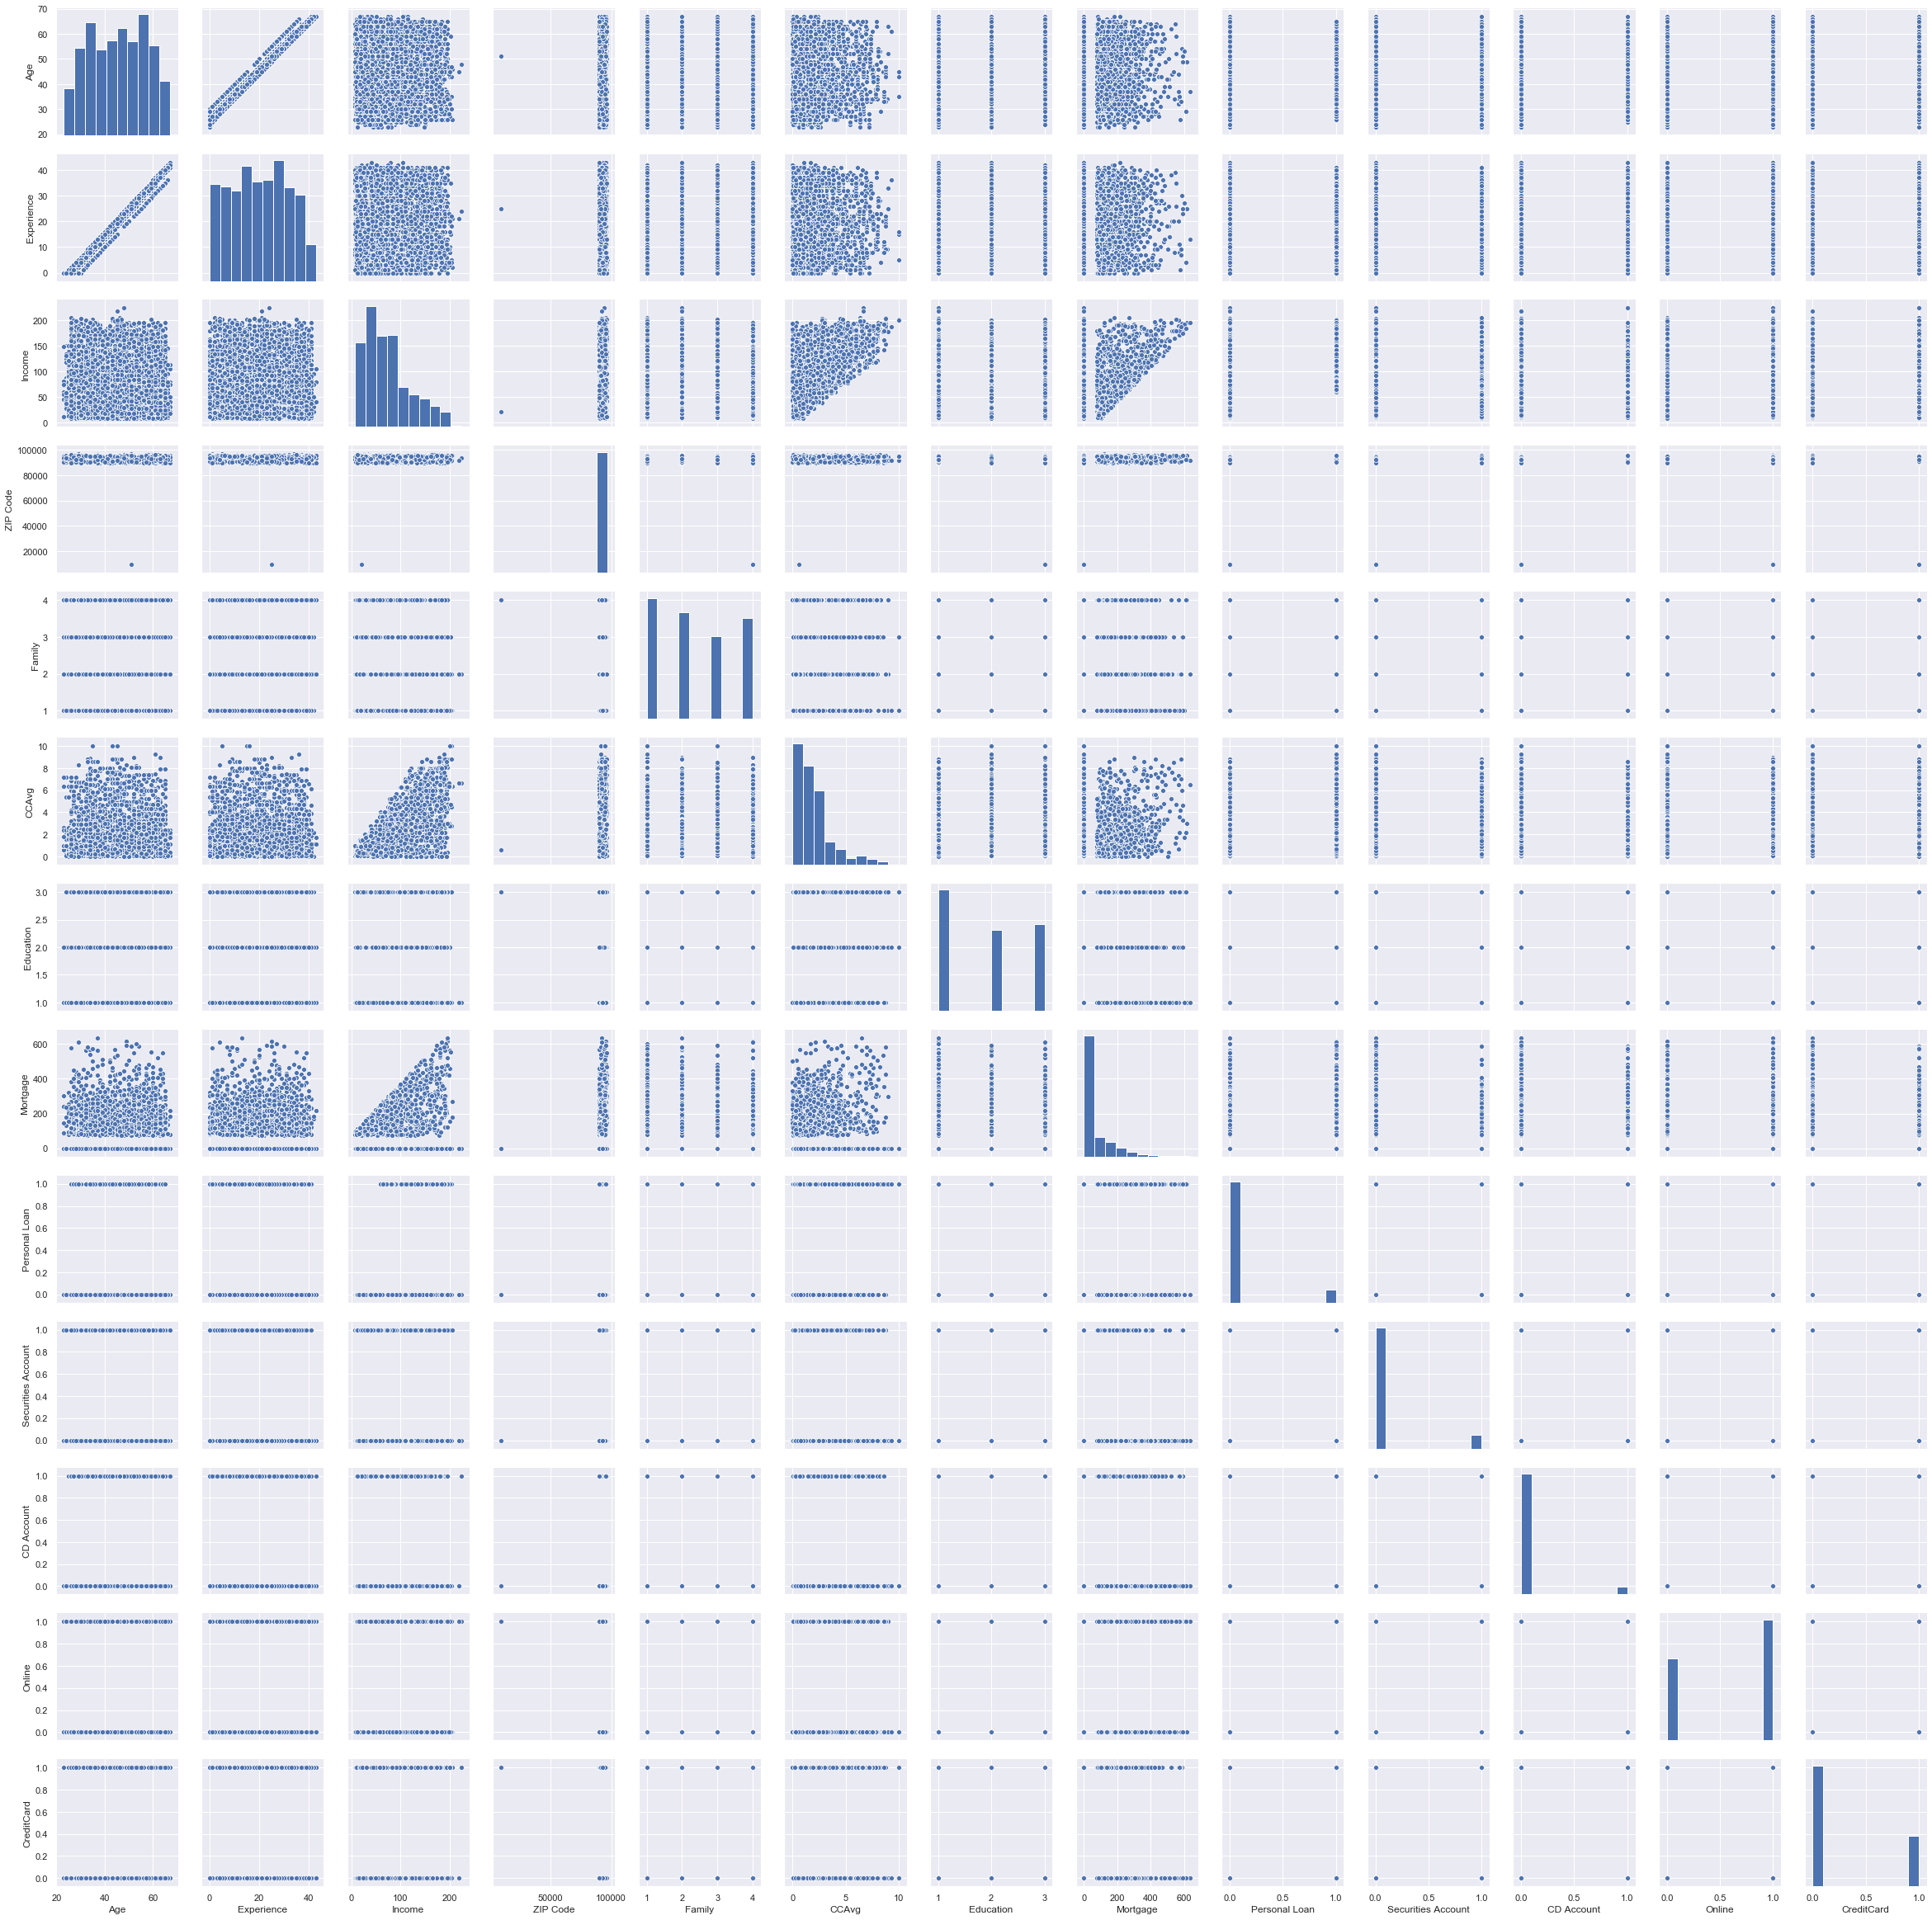

In [66]:
sns.pairplot(df);

Mortgage and CCAvg shows positive correlation with Income

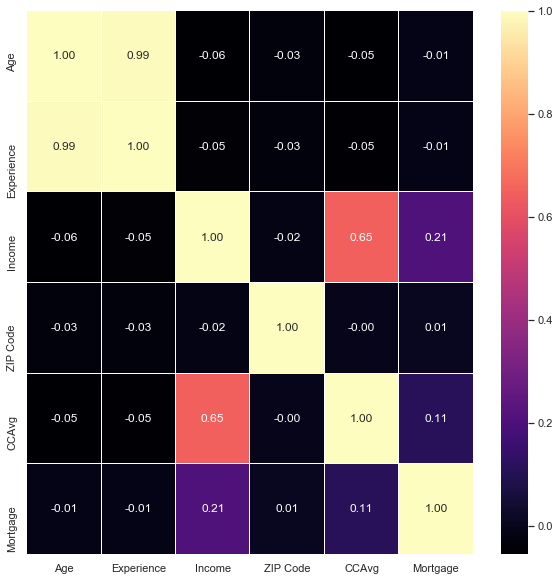

In [67]:
# Let see the heatmap to understand correlation among various features better
fig,ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(df.corr(),ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma");

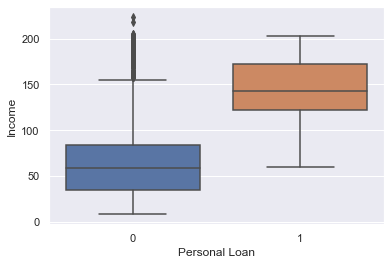

In [68]:
sns.boxplot(df['Personal Loan'], df['Income']);

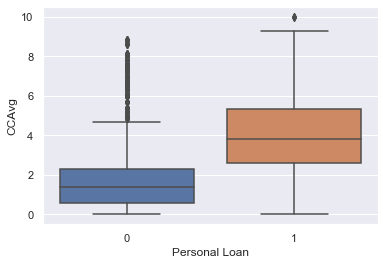

In [69]:
sns.boxplot(df['Personal Loan'], df['CCAvg']);

This box plot also provides important information that folks who have monthly credit card spend in the range of 2.25 K - 5.75K are more inclined towards the Personal loan (it includes 50% population)

It is observed fro the box plot that 50% of folks who opted for Personal loan have income in the range of $125K - $175K.
Also top 25% folks who opt for Personal loan has income in the range of $175K - $200K (approx). It shows folks who are having higher income tend to go for personal loan except some very high income folks.

In [70]:
# Let's measure the skewness of every attribute
df.skew() 

Age                   -0.029341
Experience            -0.017221
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [71]:
# Let's check if there is any duplicate records
df.duplicated().sum()
# We understood there is no duplicate record
print(df.shape)
df.head()

(5000, 13)


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Import machine learning specific libraries

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
from PIL import Image 


### 3. Split the data into training and test set in the ratio of 70:30 respectively

In [94]:
# Perform One Hot Encoding and delete first column from generated dummy columns for each catgorical features
# df_dummies = pd.get_dummies(df, drop_first=True)
# df_dummies.head()

features = df.drop('Personal Loan', axis=1)
label = df['Personal Loan']


#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
print(df['Personal Loan'].value_counts(normalize=True))

#Above result shows high imbalance in the data

x_train, x_test, y_train, y_test = train_test_split(features,label, test_size=0.3, random_state=1000)




0    0.904
1    0.096
Name: Personal Loan, dtype: float64


### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance

In [96]:
#Create model for prediction
model = LogisticRegression() # model object has been created
model.fit(x_train, y_train)                    # train the model
print('Training accuracy: ', model.score(x_train, y_train))
print()
print('Testing accuracy: ', model.score(x_test, y_test))                     
y_pred = model.predict(x_test)                 # predict the value
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))
print()

customer_buy_loan_pred = model.predict(features)

print('Accuracy score: ',accuracy_score(y_test,y_pred))
print()
print('Prdection for number of customer buying personal loan: ',len(customer_buy_loan_pred[customer_buy_loan_pred != 0]))

Training accuracy:  0.9091428571428571

Testing accuracy:  0.906

Recall: 0.31690140845070425

Precision: 0.5056179775280899

F1 Score: 0.38961038961038963

Roc Auc Score: 0.6422504096745422

Accuracy score:  0.906

Prdection for number of customer buying personal loan:  293


This model though shows high accuracy and lower number of other metrics. It is beucase the target data is highly imbalance hence this model is unable to predict the number of people opting for loan with good accuracy until we improve the prediction.

In [97]:
cm = confusion_matrix(label, customer_buy_loan_pred)
df_cm = pd.DataFrame(cm)
df_cm

,0,1
0,4384,136
1,323,157


In [98]:
tn, fp, fn, tp = confusion_matrix(label, customer_buy_loan_pred).ravel() 
print(tn, fp, fn, tp)
print()
print('Precision: ', tp/(tp+fp))
print()
print(classification_report(label, customer_buy_loan_pred)) 
print()
acc = accuracy_score(label, customer_buy_loan_pred)
print('Accuracy: ',acc)

4384 136 323 157

Precision:  0.5358361774744027

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.33      0.41       480

    accuracy                           0.91      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000


Accuracy:  0.9082


Metrics generated from Confusion metrics also return same results as we got earlier

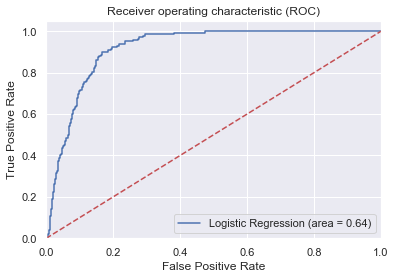

In [99]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Improve performance of the model

In [100]:
# Let see what parameters were used in previous model

hyper_param = model.get_params()
print(hyper_param)
df_param = pd.DataFrame(hyper_param, index=np.arange(0,1))
df_param


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


,C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
0,1.0,None,False,True,1,None,100,warn,None,l2,None,warn,0.0001,0,False


As shown above, default value for hyperparameters are not giving good predictions for number of people opted for loan. We would have to optimizat these hyperparameters.  <br>

We can pass different combinations for these hyperparameters and try to get best result. This is time consuming activite, instead sklearn.model_selection provides GridSearchCV to autometically optimize these hyperparameters and provide best prediction result. GridSearchCV evaluate mutiple combinations provided and predict value for each combination. Since it evaluates multiple model hence this process takes little extra time to iterate over multiple combinations of hyperparameters and provide best model/classifier


#### Perform hyperparameters tuning to get best model for the given dataset

In [107]:
# For Hyperparameter tunings
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunings
param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)   # clf refers to classifier
best_model = clf.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.4min finished


In [108]:
df_cv = pd.DataFrame(best_clf.cv_results_)  #cv - Cross Value
df_cv.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.116625,0.014901,0.005968,0.000814,0.0001,100,l2,lbfgs,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...",0.909169,0.908312,0.907376,0.908286,0.000732,141
1,0.720856,0.037216,0.007373,0.001271,0.0001,100,l2,newton-cg,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...",0.910026,0.910883,0.909091,0.910000,0.000732,113
2,0.043678,0.014624,0.009284,0.003401,0.0001,100,l2,liblinear,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...",0.910026,0.907455,0.909091,0.908857,0.001063,125
3,0.192214,0.026401,0.006233,0.001273,0.0001,100,l2,sag,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...",0.903171,0.903171,0.903945,0.903429,0.000365,301
4,0.169735,0.005633,0.009093,0.002941,0.0001,100,l2,saga,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'...",0.903171,0.903171,0.903945,0.903429,0.000365,301


In [111]:
# Get the optimized hyperparameter
print('Optimized hyperparameter: ', best_model.best_estimator_)
print()
print('Best Parameters: ',best_model.best_params_)
print()
print('Best Score: ',best_model.best_score_)
print()

label_pred = best_model.predict(features)
y_pred_t = best_model.predict(x_test)

print('Accuracy score: ',accuracy_score(y_test,y_pred_t))
print()
print('Training accuracy: ', best_model.score(x_train, y_train))
print()
print('Testing accuracy: ', best_model.score(x_test, y_test))                     

print()
print("Recall:",recall_score(y_test,y_pred_t))
print()
print("Precision:",precision_score(y_test,y_pred_t))
print()
print("F1 Score:",f1_score(y_test,y_pred_t))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred_t))
print()

customer_buy_loan_pred_t = best_model.predict(features)

print('Accuracy score: ',accuracy_score(y_test,y_pred_t))
print()
print('Prdection for number of customer buying personal loan: ',len(label_pred[label_pred != 0]))

Optimized hyperparameter:  LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Best Parameters:  {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Best Score:  0.9528571428571428

Accuracy score:  0.9473333333333334

Training accuracy:  0.9511428571428572

Testing accuracy:  0.9473333333333334

Recall: 0.6338028169014085

Precision: 0.7692307692307693

F1 Score: 0.6949806949806951

Roc Auc Score: 0.8069603186127071

Accuracy score:  0.9473333333333334

Prdection for number of customer buying personal loan:  368


In [113]:
cm_tuned = confusion_matrix(label, customer_buy_loan_pred_t)
df_cm_tuned = pd.DataFrame(cm_tuned)
tn1, fp1, fn1, tp1 = confusion_matrix(label, customer_buy_loan_pred_t).ravel() 
print(tn1, fp1, fn1, tp1)
df_cm_tuned

4451 69 181 299


,0,1
0,4451,69
1,181,299


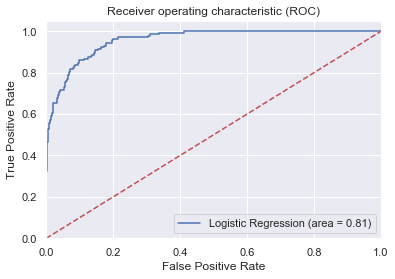

In [110]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

As we can observe above, haperparameters tuning has greatly improved various metrics and prediction result for number of people opting for personal loan

### 6. Business Insight

Confusion matrix values without hyperparameter tuning: 
tn, fp, fn, tp: 4384 136 323 157

Confusion matrix values with hyperparameter tuning: 
tn, fp, fn, tp: 4451 69 181 299

We can clearly results see the results obtained by tuned model is much better. As we can that True positve, meaning number of person predicted by model was actually eligble for personal loan, was much higher in case of tuned model vs other model (299 vs 157).

Similarly False Positive, False Negative and True Negative numbers are also better with tuned model.

Let's analyze the metrics from tuned model - 

We achieved Recall as 63%. Recall, also known as true positive rate, is the rate of values that measures positive instances that were correctly identified by the classifier. 63% recall indicates that out of 100 people who are eligible for personal loan, 63 persons were correctly classified. 

We achieved 77% precision. Precision is the rate of values that measures the accuracy of positive predictions. In this case, we can say that when precision is 77% that out of 100 people who were predicted positive for personal loan, 67 people were correctly classified. 

Although we achieved 94% accuracy but in this case accuracy is not a good measure of model performance. Primarly beucase target variable (Personal loan) is highle imbalanced.

In case of approving a customer for personal loan, bank would prefer lower False Postive then False Negative. Beucase bank would not prefer to give personal loan to someone who can't repay and then bank suffer the losses.

The tuned model is able to satisfactory result and could be deployed in the bank for predicting the customer eligibility for providing personal loan.